In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank,gaussian
from skimage.morphology import disk,rectangle,square
from skimage.restoration import denoise_nl_means,estimate_sigma
import scipy.ndimage as ndi
import cv2

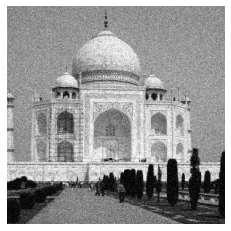

In [2]:
I = cv2.imread('im11.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
fig1=plt.figure(figsize = (4,4))
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

## Mean filter

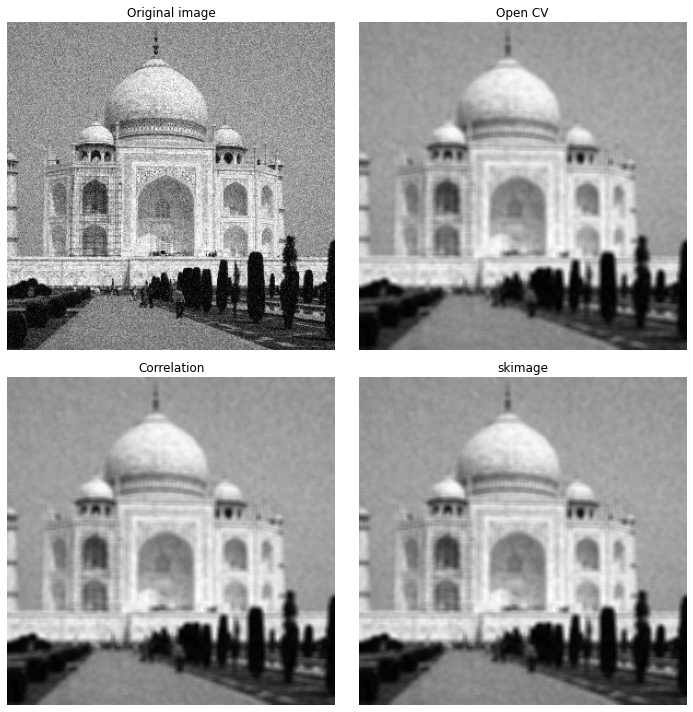

In [3]:
# Open CV 
If = cv2.blur(I,(5, 5))     #desenfoque (promedio)

# correlation 
sf=5
kernel = np.full((sf, sf), 1/sf**2)
If2=ndi.correlate(I,kernel, mode='reflect')

# skimage
obj = square(5)
If3 = rank.mean(I,obj)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(I, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(If, cmap='gray')
ax[0, 1].set_title('Open CV')

ax[1, 0].imshow(If2, cmap='gray')
ax[1, 0].set_title('Correlation')

ax[1, 1].imshow(If3, cmap='gray')
ax[1, 1].set_title('skimage')
for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

## Median filter

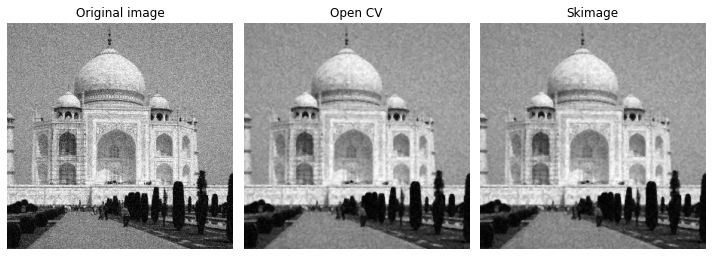

In [4]:
I_median = cv2.medianBlur(I, 3)

obj = square(3)
I_median2 = rank.median(I,obj)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(I_median, cmap='gray')
ax[1].set_title('Open CV')

ax[2].imshow(I_median2, cmap='gray')
ax[2].set_title('Skimage')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

## Gaussian filter

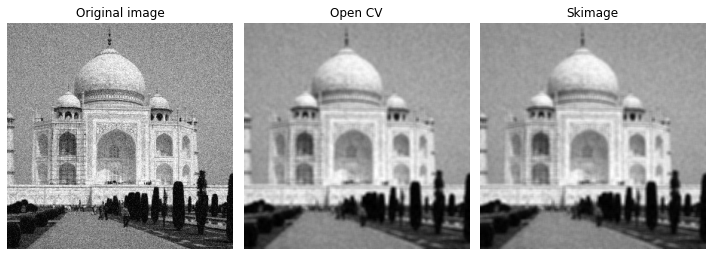

In [5]:
Ig = cv2.GaussianBlur(I,(5,5),cv2.BORDER_DEFAULT)
Ig2  = gaussian(I, sigma=10, truncate=1/5)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(Ig, cmap='gray')
ax[1].set_title('Open CV')

ax[2].imshow(Ig2, cmap='gray')
ax[2].set_title('Skimage')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

In [6]:
##  No local means filter

In [7]:
I=I.astype(float)
sigma_est=np.mean(estimate_sigma(I))

In=denoise_nl_means(I,h=1.15*sigma_est,fast_mode=False,patch_size=5,patch_distance=6)
#dst = cv2.fastNlMeansDenoisingColored(I,None,10,10,7,21)
I=I.astype(np.uint8)

Text(0.5, 1.0, 'no local means')

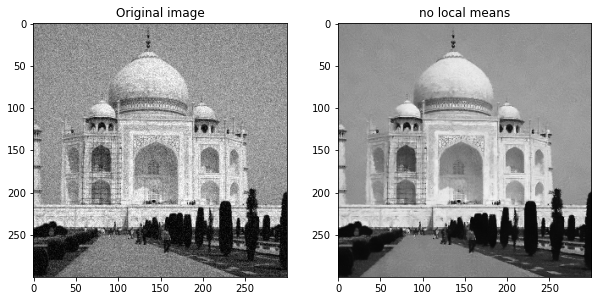

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(In, cmap='gray')
ax[1].set_title('no local means')